In [6]:
# Lak et al neuron 2017
# zz 2019
import numpy as np
from numpy.random import *
import math

In [7]:
def get_rwd_type(stim_type,rwd_types):
    # for a give stim type, return rewarded choice
    if stim_type<0:
        rwd_choice = rwd_types[0]
    elif stim_type>0:
        rwd_choice = rwd_types[1]
    elif stim_type == 0:
        rwd_choice = rwd_types[np.random.randint(0,2)]
    return rwd_choice

def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [8]:
# define stim types and rewarded choice 
stim_types = np.array([-.5, -.25, -.125, 0, .125, .25, .5])  # coherence < 0 choose left 
stim_prob = np.array([1,1,1,1,1,1,1 ]) # proportion of each stim type
stim_prob = stim_prob/sum(stim_prob)
choice_types = np.array([0, 1])    # left if 0, right is 1
reward_sizes = np.array([1,1])   # reward size corresponding to each choice
reward_sizes = reward_sizes/max(reward_sizes)
num_trials = 500
s_sigma = 0.04 # sigma for distribution of sm-hat
alpha = 0.02

In [9]:
# initialisation
num_stim_types = stim_types.size
num_choice_types = choice_types.size
Q = np.zeros((num_stim_types,num_choice_types)) # Q table

num_trials_per_type = [np.round(num_trials*p) for p in stim_prob]

# stimulus type on each trial
stim_array = np.array([])
for n in range(num_stim_types):
    stim_array = np.append(stim_array,[np.ones(int(num_trials_per_type[n]))* stim_types[n] ])
np.random.shuffle(stim_array)
num_trials = stim_array.size
# rewarded choice on each trial
rwd_choice_array = np.array([get_rwd_type(s,choice_types) for s in stim_array])


# log training
Q_train = np.empty((num_stim_types,num_choice_types,num_trials))
choice_train = np.empty(num_trials)
delta_m_train = np.empty(num_trials)
delta_fb_train = np.empty(num_trials)
bel_train = np.empty((num_stim_types,num_trials))
vfc_train = np.empty(num_trials)
rwd_train = np.empty(num_trials)
print(num_stim_types)


7


In [10]:
Vfc = 0
for i in range(num_trials):
    # fixation 
    Vfc = sum(sum(Q,0))/2
    
    # stimulus and belief state
    s = stim_array[i]
    sh = normal(s,s_sigma)
    bel = np.array([normpdf(sh,stims,s_sigma) for stims in stim_types])
    bel = bel/sum(bel)
    Qleft = sum([bel[ii]*Q[ii,0] for ii in range(num_stim_types)])
    Qright = sum([bel[ii]*Q[ii,1] for ii in range(num_stim_types)])
    this_choice = Qright-Qleft
    if this_choice>0:
        this_choice = 1
    elif this_choice<0:
        this_choice = 0
    else:
        this_choice = int(choice_types[np.random.randint(0,2)])
        
    if this_choice == rwd_choice_array[i]:
        r = 1*reward_sizes[this_choice]
    else:
        r = 0
    print('trial '+ str(i)+ ' stim '+ str(s)+ ', choice ' +str(this_choice)+', rwd '+str(r))
    delta_m = max([Qleft, Qright])-Vfc
    delta_fb =  r - max([Qleft, Qright])     
    Q[:,this_choice] = Q[:,this_choice]+alpha*bel.transpose()*delta_fb
    
    # log
    Q_train[:,:,i] = Q
    choice_train[i] = this_choice
    delta_m_train[i] = delta_m
    delta_fb_train[i] = delta_fb
    bel_train[:,i] = bel
    vfc_train[i] = Vfc
    rwd_train[i] = r
    


trial 0 stim 0.5, choice 0, rwd 0
trial 1 stim 0.5, choice 0, rwd 0
trial 2 stim -0.5, choice 0, rwd 1.0
trial 3 stim -0.5, choice 0, rwd 1.0
trial 4 stim 0.5, choice 0, rwd 0
trial 5 stim -0.125, choice 0, rwd 1.0
trial 6 stim 0.125, choice 0, rwd 0
trial 7 stim 0.125, choice 0, rwd 0
trial 8 stim 0.5, choice 1, rwd 1.0
trial 9 stim -0.125, choice 0, rwd 1.0
trial 10 stim 0.25, choice 1, rwd 1.0
trial 11 stim -0.25, choice 0, rwd 1.0
trial 12 stim 0.0, choice 0, rwd 1.0
trial 13 stim -0.5, choice 0, rwd 1.0
trial 14 stim 0.125, choice 0, rwd 0
trial 15 stim 0.25, choice 1, rwd 1.0
trial 16 stim 0.0, choice 0, rwd 1.0
trial 17 stim -0.125, choice 0, rwd 1.0
trial 18 stim 0.5, choice 1, rwd 1.0
trial 19 stim 0.125, choice 0, rwd 0
trial 20 stim 0.5, choice 1, rwd 1.0
trial 21 stim -0.125, choice 0, rwd 1.0
trial 22 stim -0.125, choice 0, rwd 1.0
trial 23 stim 0.25, choice 1, rwd 1.0
trial 24 stim 0.5, choice 1, rwd 1.0
trial 25 stim 0.125, choice 1, rwd 1.0
trial 26 stim 0.5, choice 1, 

trial 354 stim -0.25, choice 0, rwd 1.0
trial 355 stim 0.25, choice 1, rwd 1.0
trial 356 stim 0.25, choice 1, rwd 1.0
trial 357 stim -0.125, choice 0, rwd 1.0
trial 358 stim -0.25, choice 0, rwd 1.0
trial 359 stim 0.0, choice 0, rwd 0
trial 360 stim -0.125, choice 0, rwd 1.0
trial 361 stim 0.5, choice 1, rwd 1.0
trial 362 stim 0.125, choice 1, rwd 1.0
trial 363 stim -0.5, choice 0, rwd 1.0
trial 364 stim 0.0, choice 0, rwd 0
trial 365 stim 0.25, choice 1, rwd 1.0
trial 366 stim 0.0, choice 0, rwd 1.0
trial 367 stim 0.5, choice 1, rwd 1.0
trial 368 stim -0.125, choice 0, rwd 1.0
trial 369 stim 0.25, choice 1, rwd 1.0
trial 370 stim 0.25, choice 1, rwd 1.0
trial 371 stim 0.125, choice 1, rwd 1.0
trial 372 stim -0.25, choice 0, rwd 1.0
trial 373 stim -0.125, choice 0, rwd 1.0
trial 374 stim -0.5, choice 0, rwd 1.0
trial 375 stim 0.125, choice 1, rwd 1.0
trial 376 stim 0.125, choice 1, rwd 1.0
trial 377 stim 0.125, choice 1, rwd 1.0
trial 378 stim -0.125, choice 0, rwd 1.0
trial 379 stim -

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

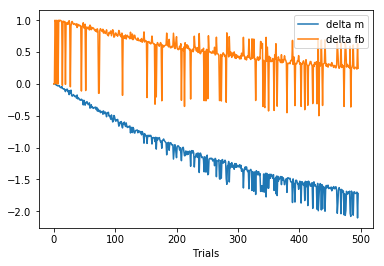

In [12]:
# plot learning 
x = np.arange(0,num_trials,1) 
ax = plt.axes()
ax.plot(x,delta_m_train,label = 'delta m')
ax.plot(x,delta_fb_train, label = 'delta fb')
plt.legend(loc='upper right')
plt.xlabel('Trials')

[ 0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


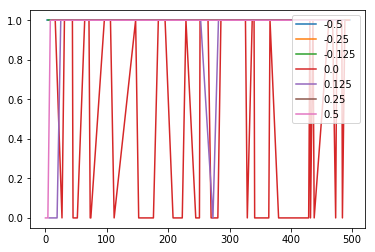

In [13]:
x = np.arange(0,num_trials,1) 
ax = plt.axes()
for i in range(num_stim_types):
    ax.plot(x[stim_array==stim_types[i]],rwd_train[stim_array==stim_types[i]],label = str(stim_types[i]))    
plt.legend(loc='upper right')


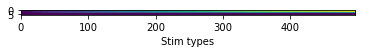

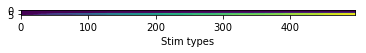

In [14]:
x = np.arange(0,num_trials,1) 
for i in range(num_choice_types):   
    plt.imshow(Q_train[:,i,:])
    plt.xlabel('Trials')
    plt.xlabel('Stim types')
    plt.show()

In [15]:
# use trained Q table to test 
DPEm = np.zeros((num_stim_types,num_trials))
DPEfb = np.zeros((num_stim_types,num_trials))
rwd_test = np.zeros((num_stim_types,num_trials))
for i in range(num_trials):
    # fixation 
    Vfc = sum(sum(Q,0))/2
    
    # stimulus and belief state
    s = stim_array[i]
    sh = normal(s,s_sigma)
    bel = np.array([normpdf(sh,stims,s_sigma) for stims in stim_types])
    bel = bel/sum(bel)
    this_stim_idx = int(np.where(stim_types==s)[0])
    Qleft = sum([bel[ii]*Q[ii,0] for ii in range(num_stim_types)])
    Qright = sum([bel[ii]*Q[ii,1] for ii in range(num_stim_types)])
    this_choice = Qright-Qleft
    if this_choice>0:
        this_choice = 1
    elif this_choice<0:
        this_choice = 0
    else:
        this_choice = int(choice_types[np.random.randint(0,2)])
        
    if this_choice == rwd_choice_array[i]:
        r = 1*reward_sizes[this_choice]
    else:
        r = 0
    print('test trial '+ str(i)+ ' stim '+ str(s)+ ', choice ' +str(this_choice)+', rwd '+str(r))
    delta_m = max([Qleft, Qright])-Vfc
    delta_fb =  r - max([Qleft, Qright])     

    # log
    DPEm[this_stim_idx,i] = delta_m
    DPEfb[this_stim_idx,i] = delta_fb
    rwd_test[this_stim_idx,i] = r


test trial 0 stim 0.5, choice 1, rwd 1.0
test trial 1 stim 0.5, choice 1, rwd 1.0
test trial 2 stim -0.5, choice 0, rwd 1.0
test trial 3 stim -0.5, choice 0, rwd 1.0
test trial 4 stim 0.5, choice 1, rwd 1.0
test trial 5 stim -0.125, choice 0, rwd 1.0
test trial 6 stim 0.125, choice 1, rwd 1.0
test trial 7 stim 0.125, choice 1, rwd 1.0
test trial 8 stim 0.5, choice 1, rwd 1.0
test trial 9 stim -0.125, choice 0, rwd 1.0
test trial 10 stim 0.25, choice 1, rwd 1.0
test trial 11 stim -0.25, choice 0, rwd 1.0
test trial 12 stim 0.0, choice 0, rwd 1.0
test trial 13 stim -0.5, choice 0, rwd 1.0
test trial 14 stim 0.125, choice 1, rwd 1.0
test trial 15 stim 0.25, choice 1, rwd 1.0
test trial 16 stim 0.0, choice 0, rwd 1.0
test trial 17 stim -0.125, choice 0, rwd 1.0
test trial 18 stim 0.5, choice 1, rwd 1.0
test trial 19 stim 0.125, choice 1, rwd 1.0
test trial 20 stim 0.5, choice 1, rwd 1.0
test trial 21 stim -0.125, choice 0, rwd 1.0
test trial 22 stim -0.125, choice 0, rwd 1.0
test trial 23 

test trial 410 stim 0.25, choice 1, rwd 1.0
test trial 411 stim -0.125, choice 0, rwd 1.0
test trial 412 stim -0.5, choice 0, rwd 1.0
test trial 413 stim -0.25, choice 0, rwd 1.0
test trial 414 stim 0.0, choice 0, rwd 0
test trial 415 stim -0.25, choice 0, rwd 1.0
test trial 416 stim -0.25, choice 0, rwd 1.0
test trial 417 stim -0.25, choice 0, rwd 1.0
test trial 418 stim 0.125, choice 1, rwd 1.0
test trial 419 stim -0.125, choice 0, rwd 1.0
test trial 420 stim -0.5, choice 0, rwd 1.0
test trial 421 stim 0.25, choice 1, rwd 1.0
test trial 422 stim 0.0, choice 0, rwd 0
test trial 423 stim -0.5, choice 0, rwd 1.0
test trial 424 stim -0.25, choice 0, rwd 1.0
test trial 425 stim 0.5, choice 1, rwd 1.0
test trial 426 stim -0.125, choice 0, rwd 1.0
test trial 427 stim 0.5, choice 1, rwd 1.0
test trial 428 stim 0.125, choice 1, rwd 1.0
test trial 429 stim 0.0, choice 1, rwd 1.0
test trial 430 stim 0.25, choice 1, rwd 1.0
test trial 431 stim 0.0, choice 1, rwd 0
test trial 432 stim 0.0, choice

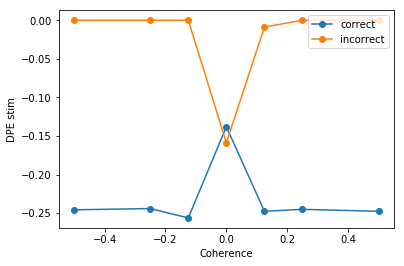

In [16]:
x = stim_types
plt.plot(x,np.mean(DPEm*np.ceil(rwd_test),1),marker = 'o',label = 'correct')
plt.plot(x,np.mean(DPEm*(np.ones(rwd_test.shape)-np.ceil(rwd_test)),1),marker = 'o',label = 'incorrect')
plt.xlabel('Coherence')
plt.ylabel('DPE stim')
plt.legend(loc='upper right')


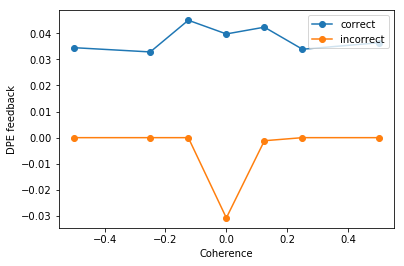

In [17]:
x = stim_types
plt.plot(x,np.mean(DPEfb*np.ceil(rwd_test),1),marker = 'o',label = 'correct')
plt.plot(x,np.mean(DPEfb*(np.ones(rwd_test.shape)-np.ceil(rwd_test)),1),marker = 'o',label = 'incorrect')
plt.xlabel('Coherence')
plt.ylabel('DPE feedback')
plt.legend(loc='upper right')

In [19]:
print(Q)

[[  7.58744059e-01   9.92318714e-44]
 [  7.72396201e-01   2.11451556e-14]
 [  7.15671184e-01   4.84226714e-06]
 [  3.82854587e-01   8.06387620e-02]
 [  1.36427610e-02   7.22284198e-01]
 [ -1.69120284e-06   7.66375396e-01]
 [ -6.36994928e-23   7.45538549e-01]]
